<a href="https://colab.research.google.com/github/kirath2205/Machine-Learning-Plant-seedling/blob/main/Plant_Seedlings_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip '/content/gdrive/MyDrive/train (1).zip'
!unzip '/content/gdrive/MyDrive/test (1).zip'

Streaming output truncated to the last 5000 lines.
  inflating: Charlock/c07c67078.png  
  inflating: Charlock/c0aac7fc2.png  
  inflating: Charlock/c0ae1e074.png  
  inflating: Charlock/c0e365810.png  
  inflating: Charlock/c19bc586d.png  
  inflating: Charlock/c1b1e4f9d.png  
  inflating: Charlock/c291766ce.png  
  inflating: Charlock/c2a1c8163.png  
  inflating: Charlock/c397b8d1a.png  
  inflating: Charlock/c39fea9e3.png  
  inflating: Charlock/c45aa7507.png  
  inflating: Charlock/c5cca5955.png  
  inflating: Charlock/c61d3ee3c.png  
  inflating: Charlock/c6368b901.png  
  inflating: Charlock/c7ac56c83.png  
  inflating: Charlock/c836af21e.png  
  inflating: Charlock/c842c829b.png  
  inflating: Charlock/c8b44af53.png  
  inflating: Charlock/c911db696.png  
  inflating: Charlock/c9601d3ab.png  
  inflating: Charlock/c97f86135.png  
  inflating: Charlock/c9a504525.png  
  inflating: Charlock/ca1aaeb27.png  
  inflating: Charlock/ca8f0f871.png  
  inflating: Charlock/caa43063c.png  

In [16]:
import cv2

seedling_classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 
                    'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

images_by_seedling_type = {'Black-grass': [], 
                  'Charlock': [], 
                  'Cleavers': [], 
                  'Common Chickweed': [], 
                  'Common wheat': [], 
                  'Fat Hen': [],
                  'Loose Silky-bent': [],
                  'Maize': [],
                  'Scentless Mayweed': [],
                  'Shepherds Purse': [],
                  'Small-flowered Cranesbill': [],
                  'Sugar beet': []}
images = []
for cls in seedling_classes:
    cur_dir = '/content/'+cls
    for filename in os.listdir(cur_dir):
        img = cv2.imread(cur_dir+"/"+filename)
        
        img = cv2.resize(img, (200,200))
        images_by_seedling_type[cls].append(img)
        
    

## Total Number of training images

In [17]:
import os
import cv2


total_count = 0
for cls in category_count.keys():
    cur_dir = '/content/'+cls
    for filename in os.listdir(cur_dir):
        total_count+=1

print('Total number of training images: '+str(total_count))


Total number of training images: 4750


# **Exploratory Data Analysis**

## **Frequency Distribution of Plant Seedling Labels**

Text(0.5, 0, 'Plant Seedling Type')

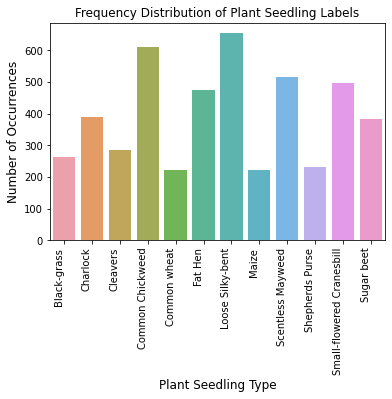

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category_count = {'Black-grass': 0, 
                  'Charlock': 0, 
                  'Cleavers': 0, 
                  'Common Chickweed': 0, 
                  'Common wheat': 0, 
                  'Fat Hen': 0,
                  'Loose Silky-bent': 0,
                  'Maize': 0,
                  'Scentless Mayweed': 0,
                  'Shepherds Purse': 0,
                  'Small-flowered Cranesbill': 0,
                  'Sugar beet': 0}

for cls in category_count.keys():
    cur_dir = '/content/'+cls
    for filename in os.listdir(cur_dir):
        category_count[cls]+=1

distribution_table_dict = {'Seedling Type': [], 'Count': []}

for cls,count in category_count.items():
    distribution_table_dict['Seedling Type'].append(cls)
    distribution_table_dict['Count'].append(count)

distribution_table_df = pd.DataFrame.from_dict(distribution_table_dict) 



plot = sns.barplot(x="Seedling Type", y="Count", data=distribution_table_df, alpha=0.9)
plt.title('Frequency Distribution of Plant Seedling Labels')

# Rotating X-Axis labels by 90 degrees for easy viewing
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Plant Seedling Type', fontsize=12)





## **General Image Information**

Type of the image:  <class 'numpy.ndarray'>

Shape of the image: (200, 200, 3)
Image Height: 200
Image Width: 200

Label: Black-grass



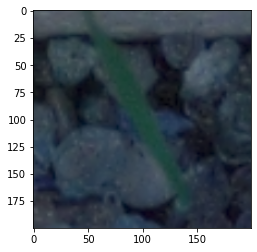

In [32]:
import matplotlib.pyplot as plt

img = images_by_seedling_type['Black-grass'][0]
# General Image Information
print('Type of the image: ',type(img))
print()
print('Shape of the image: {}'.format(img.shape))
print('Image Height: {}'.format(img.shape[0]))
print('Image Width: {}'.format(img.shape[1]))

print()

# Displaying a sample image from our data
print("Label: Black-grass")
print()
plt.imshow(img)


# **RGB Channel Analysis**

In [30]:
import numpy as np
all_images = []
for img_list in images_by_seedling_type.values():
    for img in img_list:
        all_images.append(img)
all_images = np.array(all_images)

Red Channel

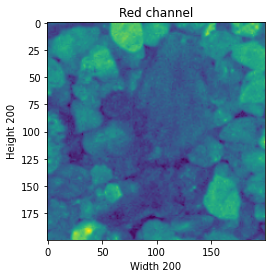

In [38]:
# Red Channel 
plt.title('Red channel')
plt.ylabel('Height {}'.format(all_images.shape[1]))
plt.xlabel('Width {}'.format(all_images.shape[2]))
plt.imshow(all_images[734, : , : , 0])
plt.show()

Green Channel

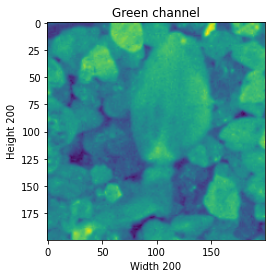

In [40]:
# Green Channel 
plt.title('Green channel')
plt.ylabel('Height {}'.format(all_images.shape[1]))
plt.xlabel('Width {}'.format(all_images.shape[2]))
plt.imshow(all_images[734, : , : , 1])
plt.show()

Blue Channel

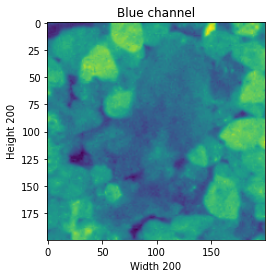

In [41]:
# Blue Channel 
plt.title('Blue channel')
plt.ylabel('Height {}'.format(all_images.shape[1]))
plt.xlabel('Width {}'.format(all_images.shape[2]))
plt.imshow(all_images[734, : , : , 2])
plt.show()

## **BGR Histograms**

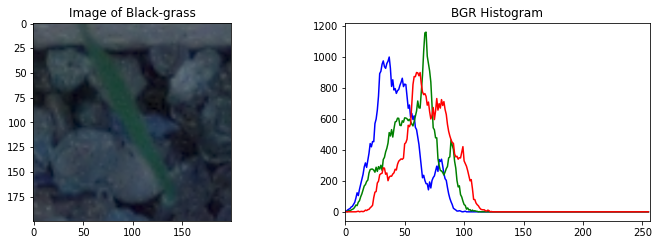

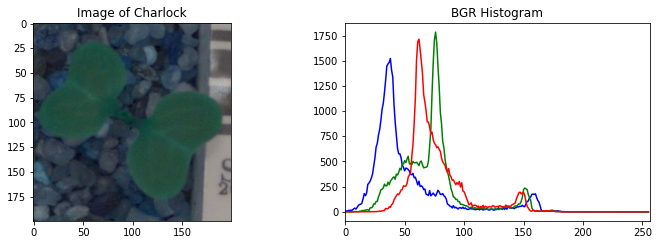

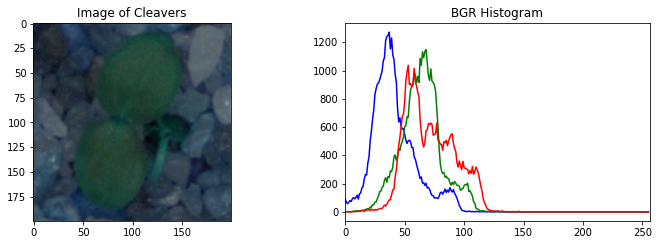

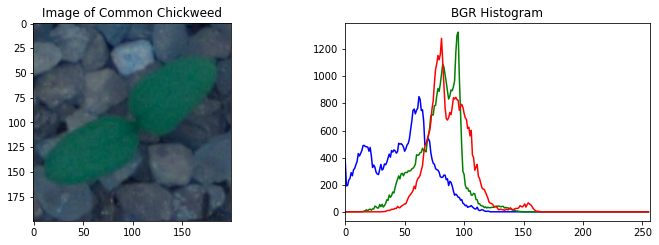

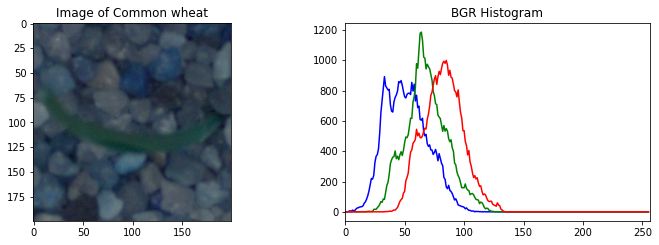

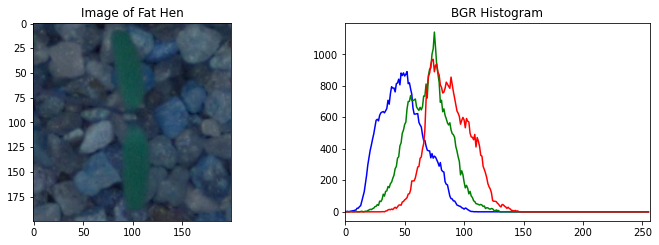

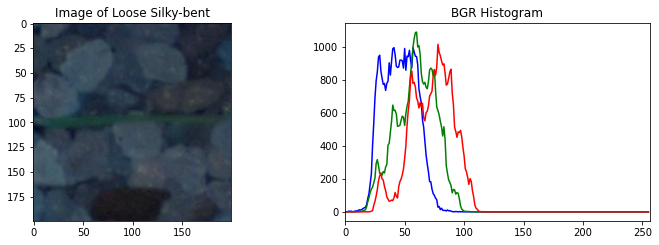

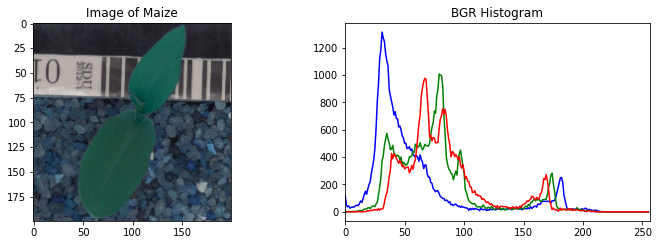

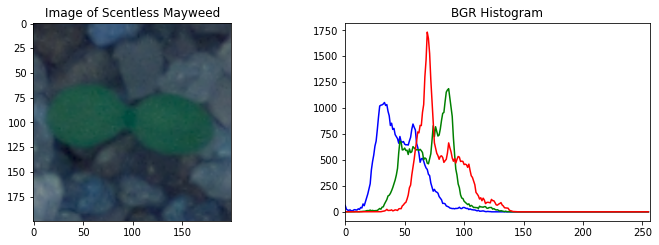

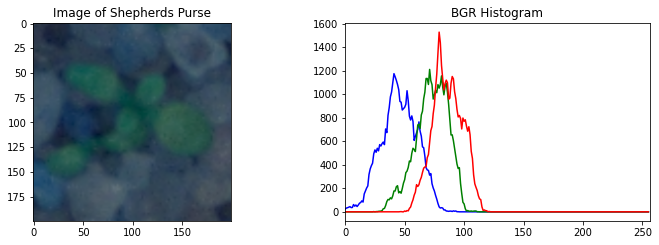

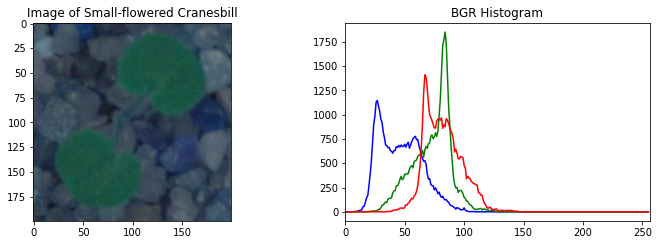

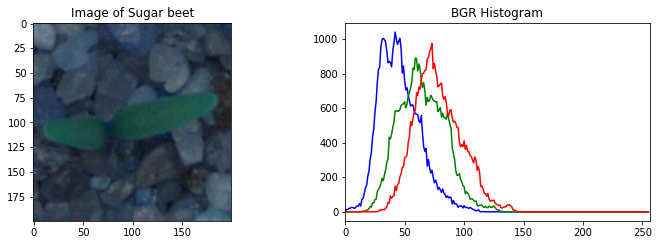

In [42]:
# Selecting images from each class

for cls in images_by_seedling_type.keys():
    img = images_by_seedling_type[cls][0]

    fig = plt.figure(figsize=(12, 8))

    # Show Original Image
    fig.add_subplot(221)
    plt.title('Image of ' + cls)
    plt.imshow(img)
    
    # Show BGR Histogrma
    fig.add_subplot(222)
    plt.title('BGR Histogram')

    color = ('b','g','r')

    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])

    plt.show()

## **Principal Component Analysis**

In [43]:
from sklearn.decomposition import PCA

pixels = all_images.flatten().reshape(4750, 120000)

# We need 2 principal components.
pca = PCA(2)
converted_data = pca.fit_transform(pixels)
 
# Confirm the dimensions of the data
converted_data.shape

(4750, 2)

In [61]:
label_ids = []
i=0
for img_list in images_by_seedling_type.values():
    for img in img_list:
        label_ids.append(i)
    i+=1

label_ids = np.array(label_ids)


Label Legend:
-------------
Black-grass: 0
Charlock: 1
Cleavers: 2
Common Chickweed: 3
Common wheat: 4
Fat Hen: 5
Loose Silky-bent: 6
Maize: 7
Scentless Mayweed: 8
Shepherds Purse: 9
Small-flowered Cranesbill: 10
Sugar beet: 11



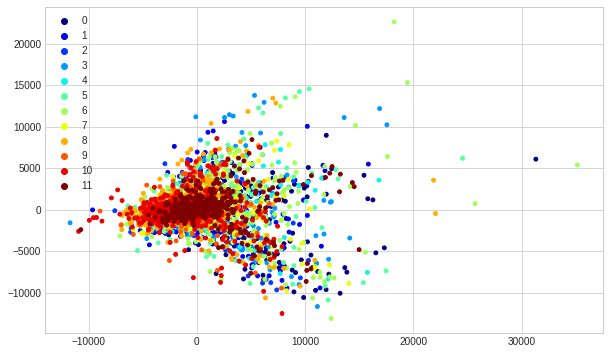

In [66]:
# Figure Styles
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 12)

# Scatter Plot
scatter = plt.scatter(converted_data[:, 0], converted_data[:, 1], c = label_ids,  s = 15, cmap = c_map)
labels = np.unique(label_ids)

# Differentiating the colors for each class
handles = [plt.Line2D([],[],marker="o", ls="",
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]

plt.legend(handles, labels)

# Printing the label legend for easy viewing
print("Label Legend:")
print("-------------")
for cls,index in label_legend.items():
    print(cls+": "+str(index))
print()

## **Image Morphology**

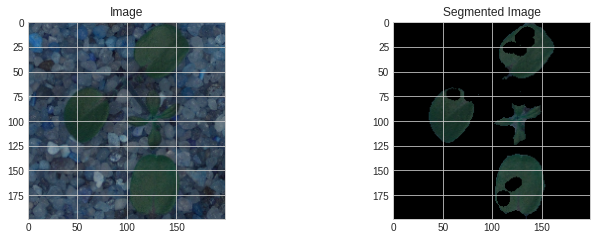

In [55]:
# References
#   - Gábor Vecsei (Kaggle)
#   - OpenCV Docs (https://docs.opencv.org/3.4/d7/d37/tutorial_mat_mask_operations.html)

"""
Creating a mask to extract the relevant features from the plant images.

    Args:
        - image: OpenCV Image 
"""
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    
    # Get pixels from image in the following (Hue, Saturation, Lightness) range
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

"""
Applying the mask on the image.

    Args:
        - image: OpenCV Image
"""
def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

fig = plt.figure(figsize=(12, 8))

img = all_images[766]

# show original image
fig.add_subplot(221)
plt.title('Image')
plt.imshow(img)

# show segmented image
segmented_image = segment_plant(img)
fig.add_subplot(222)
plt.title('Segmented Image')
plt.imshow(segmented_image)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
